In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

In [11]:
def print_table(u, index, columns):
    pd.set_option("display.precision", 11)
    df = pd.DataFrame(data=u, index=index, columns=columns)
    return df

### Problema 1

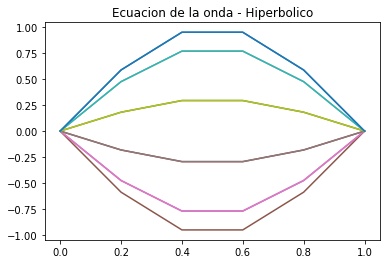

,0,U1j,U2j,U3j,U4j,0
0,0.0,0.587785252292,0.951056516295,0.951056516295,0.587785252292,0.0
1,0.0,0.475528258148,0.769420884294,0.769420884294,0.475528258148,0.0
2,0.0,0.181635632001,0.293892626146,0.293892626146,0.181635632001,0.0
3,0.0,-0.181635632001,-0.293892626146,-0.293892626146,-0.181635632001,0.0
4,0.0,-0.475528258148,-0.769420884294,-0.769420884294,-0.475528258148,0.0
5,0.0,-0.587785252292,-0.951056516295,-0.951056516295,-0.587785252292,0.0
6,0.0,-0.475528258148,-0.769420884294,-0.769420884294,-0.475528258148,0.0
7,0.0,-0.181635632001,-0.293892626146,-0.293892626146,-0.181635632001,0.0
8,0.0,0.181635632001,0.293892626146,0.293892626146,0.181635632001,0.0
9,0.0,0.475528258148,0.769420884294,0.769420884294,0.475528258148,0.0


In [4]:
def uxa(t):
    return 0


def uxb(t):
    return 0


def uyc(x):
    return np.sin(np.pi*x)


def boundary_conditions(uxa, uxb, xInterval, uyc, yInterval):
    """
    uxa: bottom boundary in xInterval
    uya, uyb: left and right boundary in yInterval
    """
    ubottom = np.empty(0)
    uleft = np.empty(0)
    uright = np.empty(0)

    for x in xInterval:
        ubottom = np.append(ubottom, uyc(x))

    for y in yInterval:
        uleft = np.append(uleft, uxa(y))
        uright = np.append(uright, uxb(y))

    return ubottom, uleft, uright


def hiperbolic(uxa, uxb, xInterval, uyc, yInterval):
    ubottom, uleft, uright = boundary_conditions(
        uxa, uxb, xInterval, uyc, yInterval)
    m = len(uleft)
    n = len(ubottom)

    u = np.zeros((m, n))

    u[0, :] = ubottom
    u[:, 0] = uleft
    u[:, -1] = uright

    # adding condition of initial partial central derivative of t
    for i in range(1, len(ubottom) - 1):
        u[1, i] = (u[0, i+1] + u[0, i-1])/2

    for j in range(1, m - 1):
        for i in range(1, n - 1):
            u[j+1, i] = u[j, i+1] + u[j, i-1] - u[j-1, i]
    return u


xa = 0
xb = 1
Δx = 0.2

yc = 0
yd = 0.5
Δy = 0.05

xInterval = np.arange(xa, xb + Δx, Δx)
yInterval = np.arange(yc, yd + Δy, Δy)
u = hiperbolic(uxa, uxb, xInterval, uyc, yInterval)
np.set_printoptions(precision=12, suppress=True)

for uk in u:
    plt.plot(xInterval, uk)
plt.title("Ecuacion de la onda - Hiperbolico")
plt.show()

print_table(u, range(len(u[:,0])), ['0', 'U1j','U2j','U3j','U4j', '0'])

### Problema 2

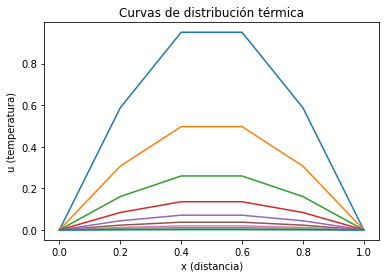

,0,U1j,U2j,U3j,U4j,0
0,0.0,0.587785252292,0.951056516295,0.951056516295,0.587785252292,0.0
1,0.0,0.307142766930,0.496967436292,0.496967436292,0.307142766930,0.0
2,0.0,0.160495144969,0.259686599590,0.259686599590,0.160495144969,0.0
3,0.0,0.083865532033,0.135697281314,0.135697281314,0.083865532033,0.0
4,0.0,0.043823303593,0.070907594713,0.070907594713,0.043823303593,0.0
5,0.0,0.022899538002,0.037052230813,0.037052230813,0.022899538002,0.0
6,0.0,0.011965981514,0.019361364799,0.019361364799,0.011965981514,0.0
7,0.0,0.006252733727,0.010117135693,0.010117135693,0.006252733727,0.0
8,0.0,0.003267319025,0.005286633236,0.005286633235,0.003267319026,0.0
9,0.0,0.001707313007,0.002762490471,0.002762490475,0.001707313004,0.0


In [5]:
def uxa(y):
    return 0


def uxb(y):
    return 0


def uyc(x):
    return np.sin(np.pi*x)


def boundary_conditions(uxa, uxb, xInterval, uyc, yInterval):
    """
    uxa: bottom boundary in xInterval
    uya, uyb: left and right boundary in yInterval
    """
    ubottom = np.empty(0)
    uleft = np.empty(0)
    uright = np.empty(0)

    for x in xInterval:
        ubottom = np.append(ubottom, uyc(x))

    for y in yInterval:
        uleft = np.append(uleft, uxa(y))
        uright = np.append(uright, uxb(y))

    return ubottom, uleft, uright


def parabolic_explicit(uxa, uxb, xInterval, uyc, yInterval, lam):
    ubottom, uleft, uright = boundary_conditions(
        uxa, uxb, xInterval, uyc, yInterval)
    m = len(uleft)
    n = len(ubottom)

    u = np.zeros((m, n))

    u[0, :] = ubottom
    u[:, 0] = uleft
    u[:, -1] = uright

    for j in range(m - 1):
        for i in range(1, n - 1):
            u[j+1, i] = lam*u[j, i-1] + (1-2*lam)*u[j, i] + lam*u[j, i+1]
    return u

xa = 0
xb = 1
Δx = 0.2

ya = 0
yb = 0.5
Δy = 0.05
lam = Δy/Δx**2

xInterval = np.arange(xa, xb + Δx, Δx)
yInterval = np.arange(ya, yb + Δy, Δy)
u = parabolic_explicit(uxa, uxb, xInterval, uyc, yInterval, lam)
for uk in u:
    plt.plot(xInterval, uk)
plt.title("Curvas de distribución térmica")
plt.ylabel("u (temperatura)")
plt.xlabel("x (distancia)")
plt.show()

print_table(u, range(len(u[:,0])), ['0', 'U1j','U2j','U3j','U4j', '0'])

### Problema 3

In [12]:
def uxa(y):
    return 70

def uxb(y):
    return 0

def uyc(x):
    return 10

def uyd(x):
    return 90

def boundary_conditions(uxa, uxb, xInterval, uyc, uyd, yInterval):
    """
    uxa: bottom boundary in xInterval
    uya, uyb: left and right boundary in yInterval
    """
    ubottom = np.empty(0)
    utop = np.empty(0)
    uleft = np.empty(0)
    uright = np.empty(0)

    for x in xInterval:
        ubottom = np.append(ubottom, uyc(x))
        utop = np.append(utop, uyd(x))

    for y in yInterval:
        uleft = np.append(uleft, uxa(y))
        uright = np.append(uright, uxb(y))

    return ubottom, utop, uleft, uright

def elliptical(uxa, uxb, xInterval, uyc, uyd, yInterval):
    ubottom, utop, uleft, uright = boundary_conditions(
        uxa, uxb, xInterval, uyc, uyd, yInterval)
    m = len(uleft)
    n = len(ubottom)

    u = np.full((m, n), (90 + 70 + 10 + 0)/4)
    u[0, :] = ubottom
    u[-1, :] = utop
    u[:, 0] = uleft
    u[:, -1] = uright

    u = np.flip(u, 0)
    print(print_table(u, range(len(u[:,0])), ['70', 'U1j','U2j','U3j','U4j', 'U5j', '0']))
    for k in range(45):
        for j in range(1, 6):
            for i in range(1, 6):
                u[j,i] = (u[j,i-1] + u[j,i+1] + u[j-1,i] + u[j+1,i])/4
                
    return u
xa = 0
xb = 3
Δx = 0.5

ya = 0
yb = 3
Δy = 0.5

xInterval = np.arange(xa, xb + Δx, Δx)
yInterval = np.arange(ya, yb + Δy, Δy)
u = elliptical(uxa, uxb, xInterval, uyc, uyd, yInterval)

print(print_table(u, range(len(u[:,0])), ['70', 'U1j','U2j','U3j','U4j', 'U5j', '0']))

u = np.flip(u, 0)

     70   U1j   U2j   U3j   U4j   U5j    0
0  70.0  90.0  90.0  90.0  90.0  90.0  0.0
1  70.0  42.5  42.5  42.5  42.5  42.5  0.0
2  70.0  42.5  42.5  42.5  42.5  42.5  0.0
3  70.0  42.5  42.5  42.5  42.5  42.5  0.0
4  70.0  42.5  42.5  42.5  42.5  42.5  0.0
5  70.0  42.5  42.5  42.5  42.5  42.5  0.0
6  70.0  10.0  10.0  10.0  10.0  10.0  0.0
     70             U1j             U2j             U3j             U4j  \
0  70.0  90.00000000000  90.00000000000  90.00000000000  90.00000000000   
1  70.0  75.30304985273  74.35152505104  70.28480010932  62.18990155829   
2  70.0  66.86065481017  61.81822580500  54.59775183453  43.78791177799   
3  70.0  60.32131914584  51.46294219972  42.50004398682  31.80636554645   
4  70.0  52.96165758004  41.21215420224  32.13309437318  23.18184292440   
5  70.0  40.31314230984  28.29090616095  21.63832263336  16.12928587557   
6  70.0  10.00000000000  10.00000000000  10.00000000000  10.00000000000   

              U5j    0  
0  90.00000000000  0.0  
1  44

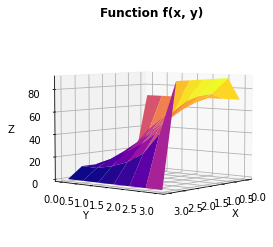

In [18]:
X1, X2 = np.meshgrid(xInterval, yInterval, sparse=True)
Z = np.copy(u)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X1, X2, Z, edgecolor='none', cmap='plasma')
ax.view_init(5, 40)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Function f(x, y)', fontweight="bold")
plt.show()

### Problema 4

In [26]:
Uxx, Uyy, Uxy, Ux, Uy, U, x, y = sp.symbols('Uxx Uyy Uxy Ux Uy U x y', real=True)
Uξξ, Uηη, Uξη, Uξ, Uη, ξ, η = sp.symbols('Uξξ Uηη Uξη Uξ Uη ξ η', real=True)
ξx, ξy, ηx, ηy = sp.symbols('ξx ξy ηx ηy', real=True)

ξ = y - sp.Rational(1/2)*x
η = -sp.Rational(3/2)*x

ξx = sp.diff(ξ, x)
ξy = sp.diff(ξ, y)
ηx = sp.diff(η, x)
ηy = sp.diff(η, y)

Ux = Uξ*ξx + Uη*ηx
Uy = Uξ*ξy + Uη*ηy

Uxx = (Uξξ*ξx + Uξη*ηx)*ξx + (Uξη*ξx + Uηη*ηx)*ηx
Uyy = (Uξξ*ξy + Uξη*ηy)*ξy + (Uξη*ξy + Uηη*ηy)*ηy

Uxy = (Uξξ*ξx + Uξη*ηx)*ξy + (Uξη*ξx + Uηη*ηx)*ηy

print("Forma canónica")
(Uxx + Uxy - 2*Uyy -2*Ux + 5*Uy -3*U)*-4/9

Forma canónica


4*U/3 - 4*Uη/3 - Uηη - 8*Uξ/3 + Uξξ

### Problema 5

In [34]:
ξ = y + sp.Rational(2)*x
η = y

ξx = sp.diff(ξ, x)
ξy = sp.diff(ξ, y)
ηx = sp.diff(η, x)
ηy = sp.diff(η, y)

Ux = Uξ*ξx + Uη*ηx
Uy = Uξ*ξy + Uη*ηy

Uxx = (Uξξ*ξx + Uξη*ηx)*ξx + (Uξη*ξx + Uηη*ηx)*ηx
Uyy = (Uξξ*ξy + Uξη*ηy)*ξy + (Uξη*ξy + Uηη*ηy)*ηy

Uxy = (Uξξ*ξx + Uξη*ηx)*ξy + (Uξη*ξx + Uηη*ηx)*ηy

print("Forma canónica")
(Uxx - 2*Uxy + 4*sp.exp('η'))/4

Forma canónica


-Uξη + exp(η)